# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [70]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp,chi2_contingency

import seaborn as sns
%matplotlib inline


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [3]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [20]:
# Your code here:
legendary= pokemon[pokemon['Legendary']==True]
non_legendary= pokemon[pokemon['Legendary']==False]
print(len(legendary))
print(len(non_legendary))


65
735


In [21]:
legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [14]:
#LEGENDARY POKEMONS
l_mean= legendary.mean()
l_std= legendary.std()

print(l_mean)
print(l_std)

#             470.215385
Total         637.384615
HP             92.738462
Attack        116.676923
Defense        99.661538
Sp. Atk       122.184615
Sp. Def       105.938462
Speed         100.184615
Generation      3.769231
Legendary       1.000000
dtype: float64
#             173.651095
Total          60.937389
HP             21.722164
Attack         30.348037
Defense        28.255131
Sp. Atk        31.104608
Sp. Def        28.827004
Speed          22.952323
Generation      1.455262
Legendary       0.000000
dtype: float64


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [15]:
#NON LEGENDARY POKEMONS
nl_mean= non_legendary.mean()
nl_std= non_legendary.std()

print(nl_mean)
print(nl_std)

#             353.315646
Total         417.213605
HP             67.182313
Attack         75.669388
Defense        71.559184
Sp. Atk        68.454422
Sp. Def        68.892517
Speed          65.455782
Generation      3.284354
Legendary       0.000000
dtype: float64
#             208.590419
Total         106.760417
HP             24.808849
Attack         30.490153
Defense        30.408194
Sp. Atk        29.091705
Sp. Def        25.669310
Speed          27.843038
Generation      1.673471
Legendary       0.000000
dtype: float64


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [24]:
ttest_ind(legendary['Total'], non_legendary['Total'],equal_var=False)

Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

What do you conclude from this test? Write your conclusions below.

Debido al valor obtenido tan bajo de Pvalue, tenemos evidencia para rechazar la hipotesis nula. Por lo tanto, rechazaríamos que la media de 'Total' para los Pokemon legendarios = la media de los no legendarios.
Es decir, hay diferencia del valor 'Total' dependiendo del tipo de Pokemon que sea.



How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [30]:
# Your code here:
type1=pokemon.groupby(['Type 1'])['Name'].count().sort_values(ascending=False)
type1


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Name, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [37]:
#WATER POKEMONS
water= pokemon[pokemon['Type 1']=='Water']

water_mean=water.mean()
water_std=water.std()

print(water_mean)
print(water_std)

#             303.089286
Total         430.455357
HP             72.062500
Attack         74.151786
Defense        72.946429
Sp. Atk        74.812500
Sp. Def        70.517857
Speed          65.964286
Generation      2.857143
Legendary       0.035714
dtype: float64
#             188.440807
Total         113.188266
HP             27.487026
Attack         28.377192
Defense        27.773809
Sp. Atk        29.030128
Sp. Def        28.460493
Speed          23.019353
Generation      1.558800
Legendary       0.186411
dtype: float64


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [38]:
#NON WATER POKEMONS
non_water= pokemon[pokemon['Type 1']!='Water']

non_water_mean=non_water.mean()
non_water_std=non_water.std()

print(non_water_mean)
print(non_water_std)

#             372.536337
Total         435.859012
HP             68.802326
Attack         79.790698
Defense        73.988372
Sp. Atk        72.495640
Sp. Def        72.127907
Speed          68.654070
Generation      3.399709
Legendary       0.088663
dtype: float64
#             209.928799
Total         121.091682
HP             25.194299
Attack         33.025152
Defense        31.719933
Sp. Atk        33.292537
Sp. Def        27.739292
Speed          29.925907
Generation      1.666119
Legendary       0.284463
dtype: float64


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [39]:
ttest_ind(water['Total'], non_water['Total'],equal_var=True)

Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

Como Pvalue > 0.05, no podemos rechazar la hipotesis nula. Por lo tanto, con alta propabilidad, el hecho de ser pokemon de agua o no serlo, no afecta en la media del valor 'Total'.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [43]:
ttest_rel(pokemon['Attack'],pokemon['Defense'],alternative='two-sided')


Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Debido al valor tan y tan bajo de Pvalue, podemos rechazar la hipotesis nula. Por lo tanto, con alta probabilidad podemos afirmar que la de media de Defensa es diferente a la media de Ataque.



We are also curious about whether there is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [44]:
ttest_rel(pokemon['Sp. Atk'],pokemon['Sp. Def'],alternative='two-sided')


Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Esta vez, como Pvalue es mayor que 0.05, no podemos rechazar la hipotesis nula, y por lo tanto, podría ser que no hubiese diferencias significativas entre el ataque especial y la defensa especial



As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [49]:
ttest_1samp((pokemon['Attack']-pokemon['Defense']),popmean=0)

#Tal y como vovlemos a comprobar, rechazamos la hipotesis nula. Por lo tanto, podemos confirmar que la media de los valores de Ataque es significativamente diferente a la de Defensa

Ttest_1sampResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [67]:
ct=pd.crosstab(pokemon.Legendary,pokemon['Type 1']=='Water',colnames=['Water'])
ct

Water,False,True
Legendary,,
False,627,108
True,61,4


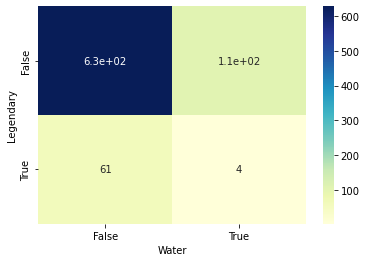

In [71]:
sns.heatmap(ct, annot=True, cmap="YlGnBu");

Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [63]:
chi2_contingency(ct)


(2.9429200762850503,
 0.08625467249550949,
 1,
 array([[632.1, 102.9],
        [ 55.9,   9.1]]))

Based on a 95% confidence, should we reject the null hypothesis?

Con un alfa de 0.05, no podemos rechazar la hipotesis nula
